# Exploratory Data Analysis on the AirBnB data


### Importing of Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


from sklearn.utils import resample

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
zhdf = pd.read_csv("listings_june.csv")

air_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


# Extracting the response 

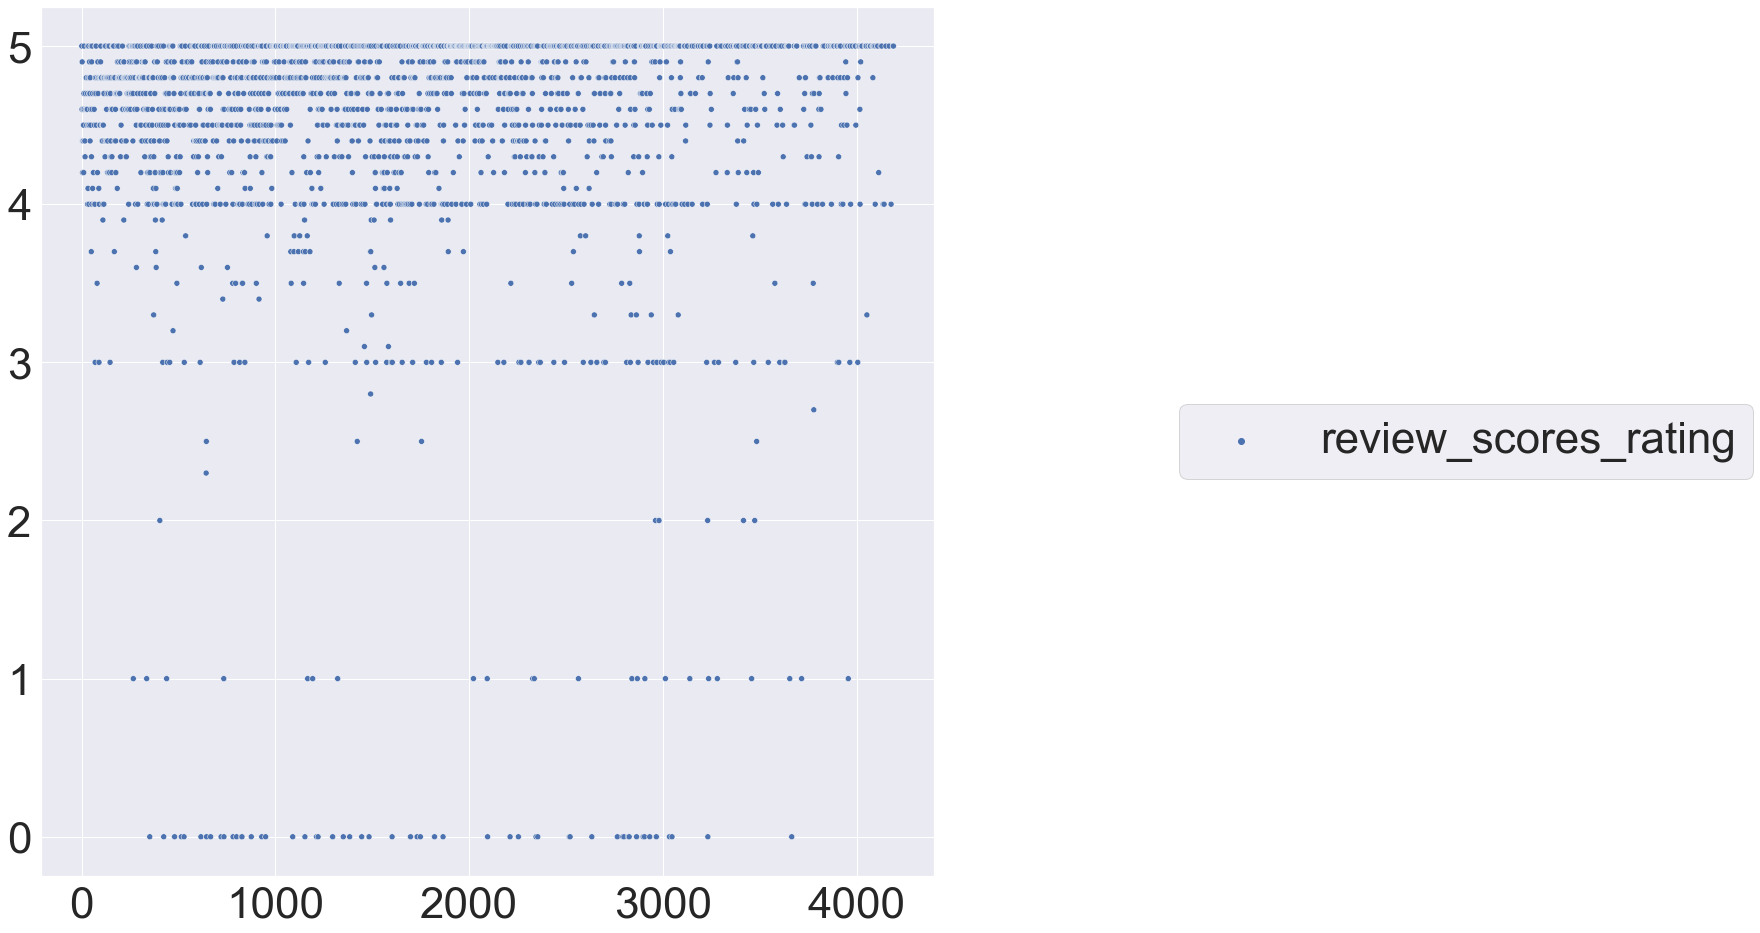

In [2]:
air_data["review_scores_rating"] = air_data["review_scores_rating"].round(1)
ratings = pd.DataFrame(air_data["review_scores_rating"])
ratings.shape
f = plt.figure(figsize=(16, 16))
sb.set(font_scale=4)
g = sb.scatterplot( data=ratings)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)



In [3]:
ratings.isna().sum()

review_scores_rating    1759
dtype: int64

In [4]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4238 non-null   int64  
 1   listing_url                                   4238 non-null   object 
 2   scrape_id                                     4238 non-null   int64  
 3   last_scraped                                  4238 non-null   object 
 4   name                                          4238 non-null   object 
 5   description                                   4091 non-null   object 
 6   neighborhood_overview                         2791 non-null   object 
 7   picture_url                                   4238 non-null   object 
 8   host_id                                       4238 non-null   int64  
 9   host_url                                      4238 non-null   o

In [5]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')
#air_data = air_data.select_dtypes(exclude=['object'])
#air_data.info()

C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/174682891.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


In [6]:
#f = plt.figure(figsize=(24, 24))
#sb.heatmap(air_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## All unique amenities in the top 100 rated AirBnB


In [7]:
top_air = air_data.sort_values(by=['review_scores_rating'],ascending=False)
top_air = top_air[0:100]
top_air.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.0,4.0,4.0,NaN,f,2,0,2,0,0.01
1921,30238429,https://www.airbnb.com/rooms/30238429,20210629180711,2021-06-29,Architectural Gem @World Building of the Year ...,The Interlace is an iconic part of the Singapo...,NaN,https://a0.muscache.com/pictures/b6aa11b5-cc27...,52198515,https://www.airbnb.com/users/show/52198515,...,5.0,5.0,5.0,NaN,f,2,1,1,0,0.06
1919,30189205,https://www.airbnb.com/rooms/30189205,20210629180711,2021-06-29,Bright and furnished 2BR apt in Novena,The property is strategically located near a f...,"A quiet neighbourhood, 10 minutes drive to tow...",https://a0.muscache.com/pictures/9634c0a0-e03c...,66406177,https://www.airbnb.com/users/show/66406177,...,5.0,5.0,5.0,NaN,f,133,133,0,0,0.06
1917,30180540,https://www.airbnb.com/rooms/30180540,20210629180711,2021-06-30,SG Family Room @ Haw Par Villa MRT,K2 Guesthouse is situated near NUS / NUH and B...,"Charming and comfortable, perfect for traveler...",https://a0.muscache.com/pictures/7f2572c4-e3cc...,18618387,https://www.airbnb.com/users/show/18618387,...,5.0,3.5,3.5,NaN,f,26,0,20,0,0.07
1912,30058572,https://www.airbnb.com/rooms/30058572,20210629180711,2021-06-29,prewar doublebed RmK* > lavender MRT.,"- Airconditioned Double-bed/Queen-size room, w...",- Apartment is within lavender neighbourhood (...,https://a0.muscache.com/pictures/df055bc1-c0f5...,97878860,https://www.airbnb.com/users/show/97878860,...,5.0,5.0,5.0,NaN,f,81,1,80,0,0.04


In [8]:
top_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 2114
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            100 non-null    int64  
 1   listing_url                                   100 non-null    object 
 2   scrape_id                                     100 non-null    int64  
 3   last_scraped                                  100 non-null    object 
 4   name                                          100 non-null    object 
 5   description                                   98 non-null     object 
 6   neighborhood_overview                         78 non-null     object 
 7   picture_url                                   100 non-null    object 
 8   host_id                                       100 non-null    int64  
 9   host_url                                      100 non-null    ob

In [9]:
top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["amenities"] =top_air["amenities"].to_frame()
top_air["amenities"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/3206109549.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')


0       Air conditioning, Elevator, Wifi, Long term st...
1921    TV, Pool, Elevator, Kitchen, First aid kit, Ir...
1919    TV, Pool, Elevator, Cooking basics, Kitchen, B...
1917    Wifi, Carbon monoxide alarm, Washer, Dishes an...
1912    Pool, Cooking basics, Paid parking off premise...
Name: amenities, dtype: object

In [10]:
top_amenities =  pd.DataFrame(''.join(top_air["amenities"]).lower().split(',')).value_counts()
top_amenities = top_air['amenities'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_amenities = top_amenities.rename_axis('amenities').reset_index(name='count')

C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/4088631288.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["host_verifications"]=top_air['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','').str.replace('/', '').str.replace("'", '')


<AxesSubplot:xlabel='count', ylabel='host_verifications'>

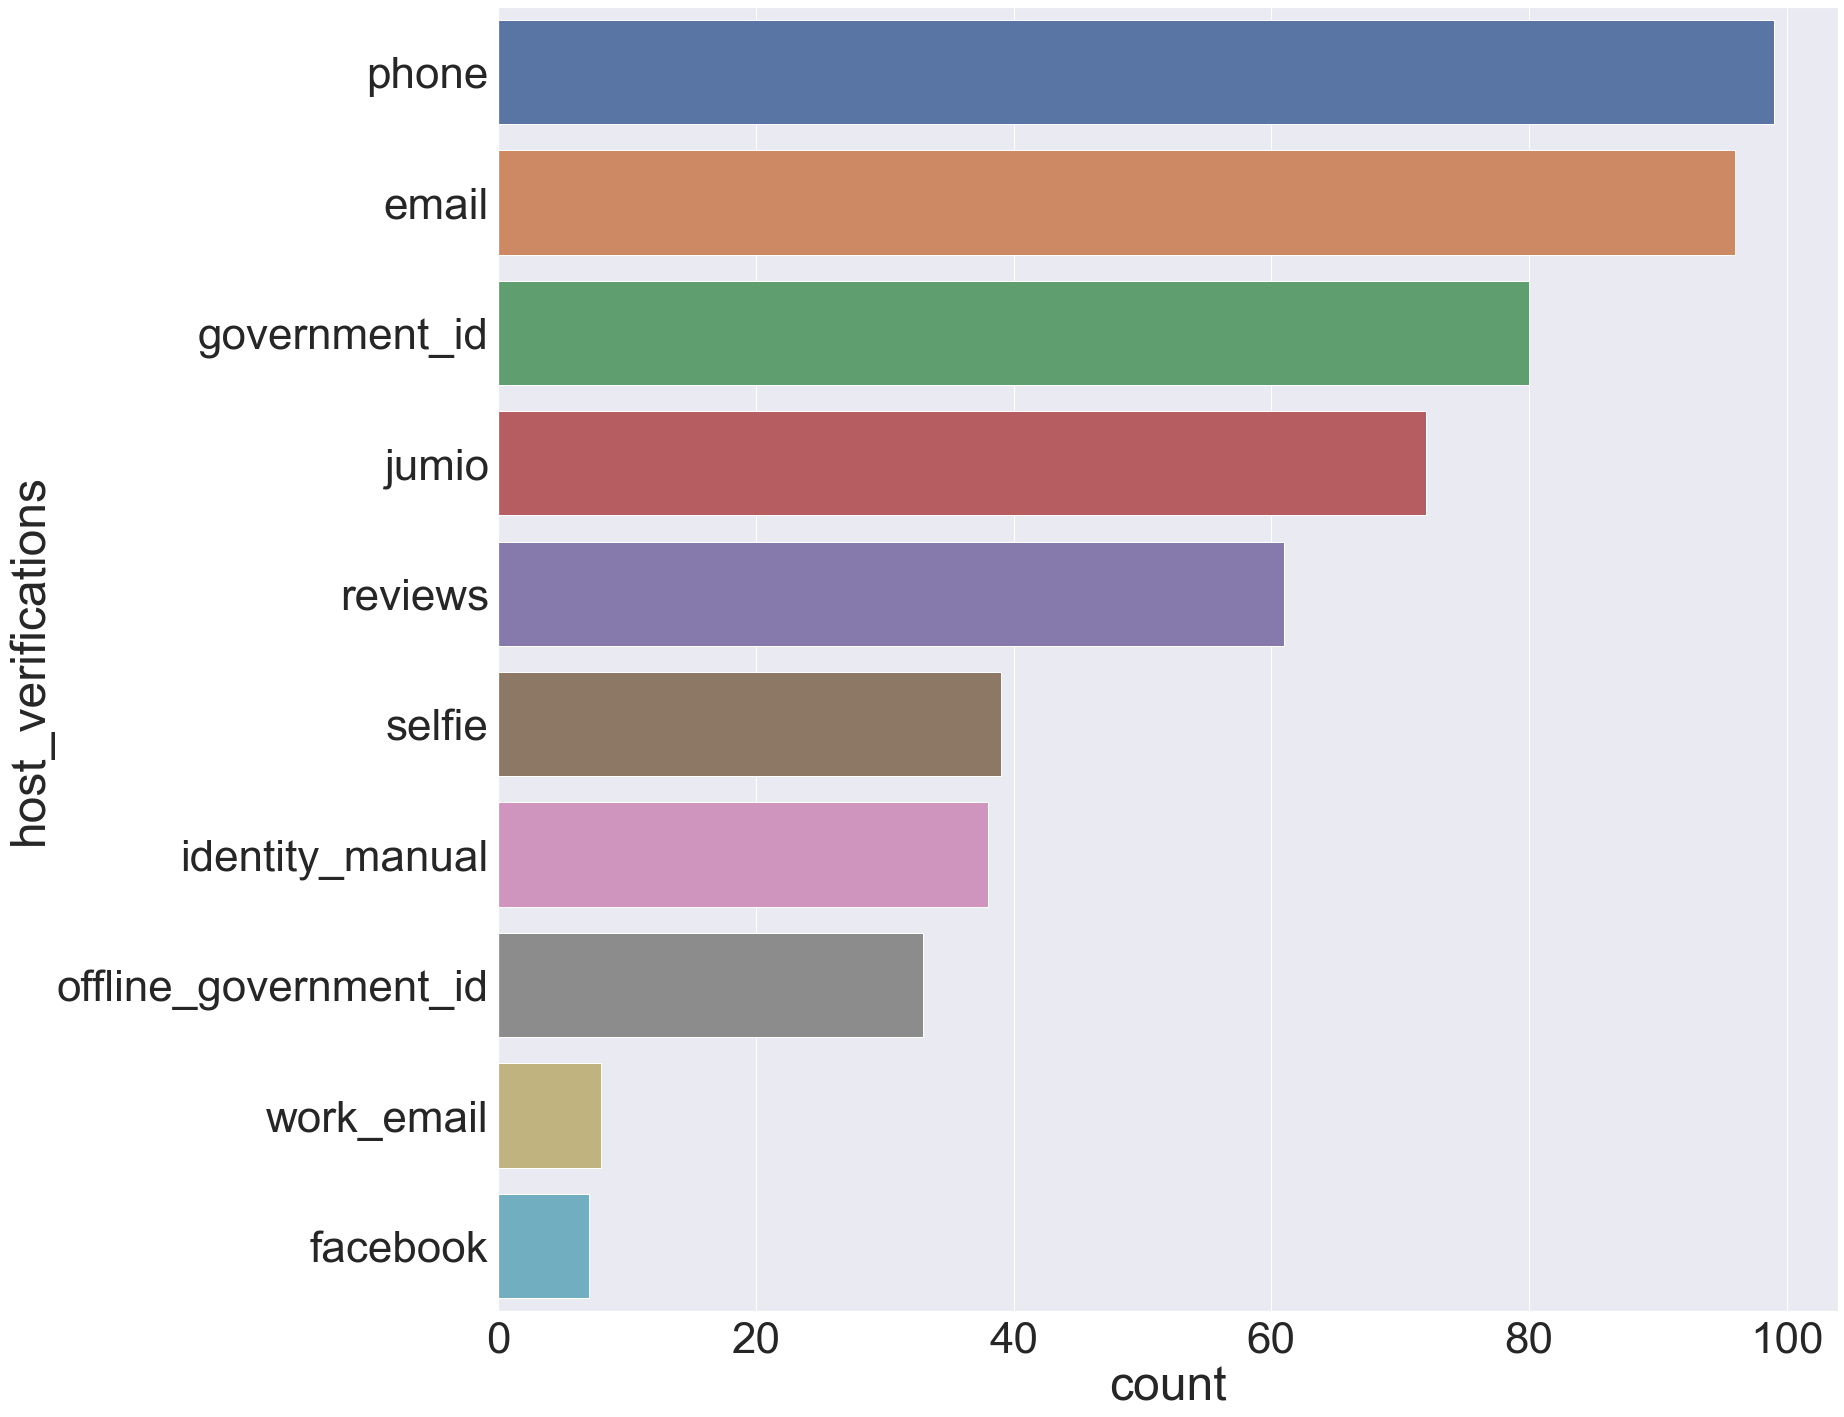

In [11]:
top_air["host_verifications"]=top_air['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','').str.replace('/', '').str.replace("'", '')
top_air["num_of_veri"]= top_air["host_verifications"].apply(lambda n: len(n.split(',')))
top_air["num_of_veri"] =top_air["num_of_veri"].to_frame()
top_air["num_of_veri"].head()


top_v =  pd.DataFrame(''.join(top_air["host_verifications"]).lower().split(',')).value_counts()
top_v = top_air['host_verifications'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_v = top_v.rename_axis('host_verifications').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.set(font_scale=4)
sb.barplot(x='count', y="host_verifications", data=top_v,orient = "h")

<AxesSubplot:xlabel='count', ylabel='amenities'>

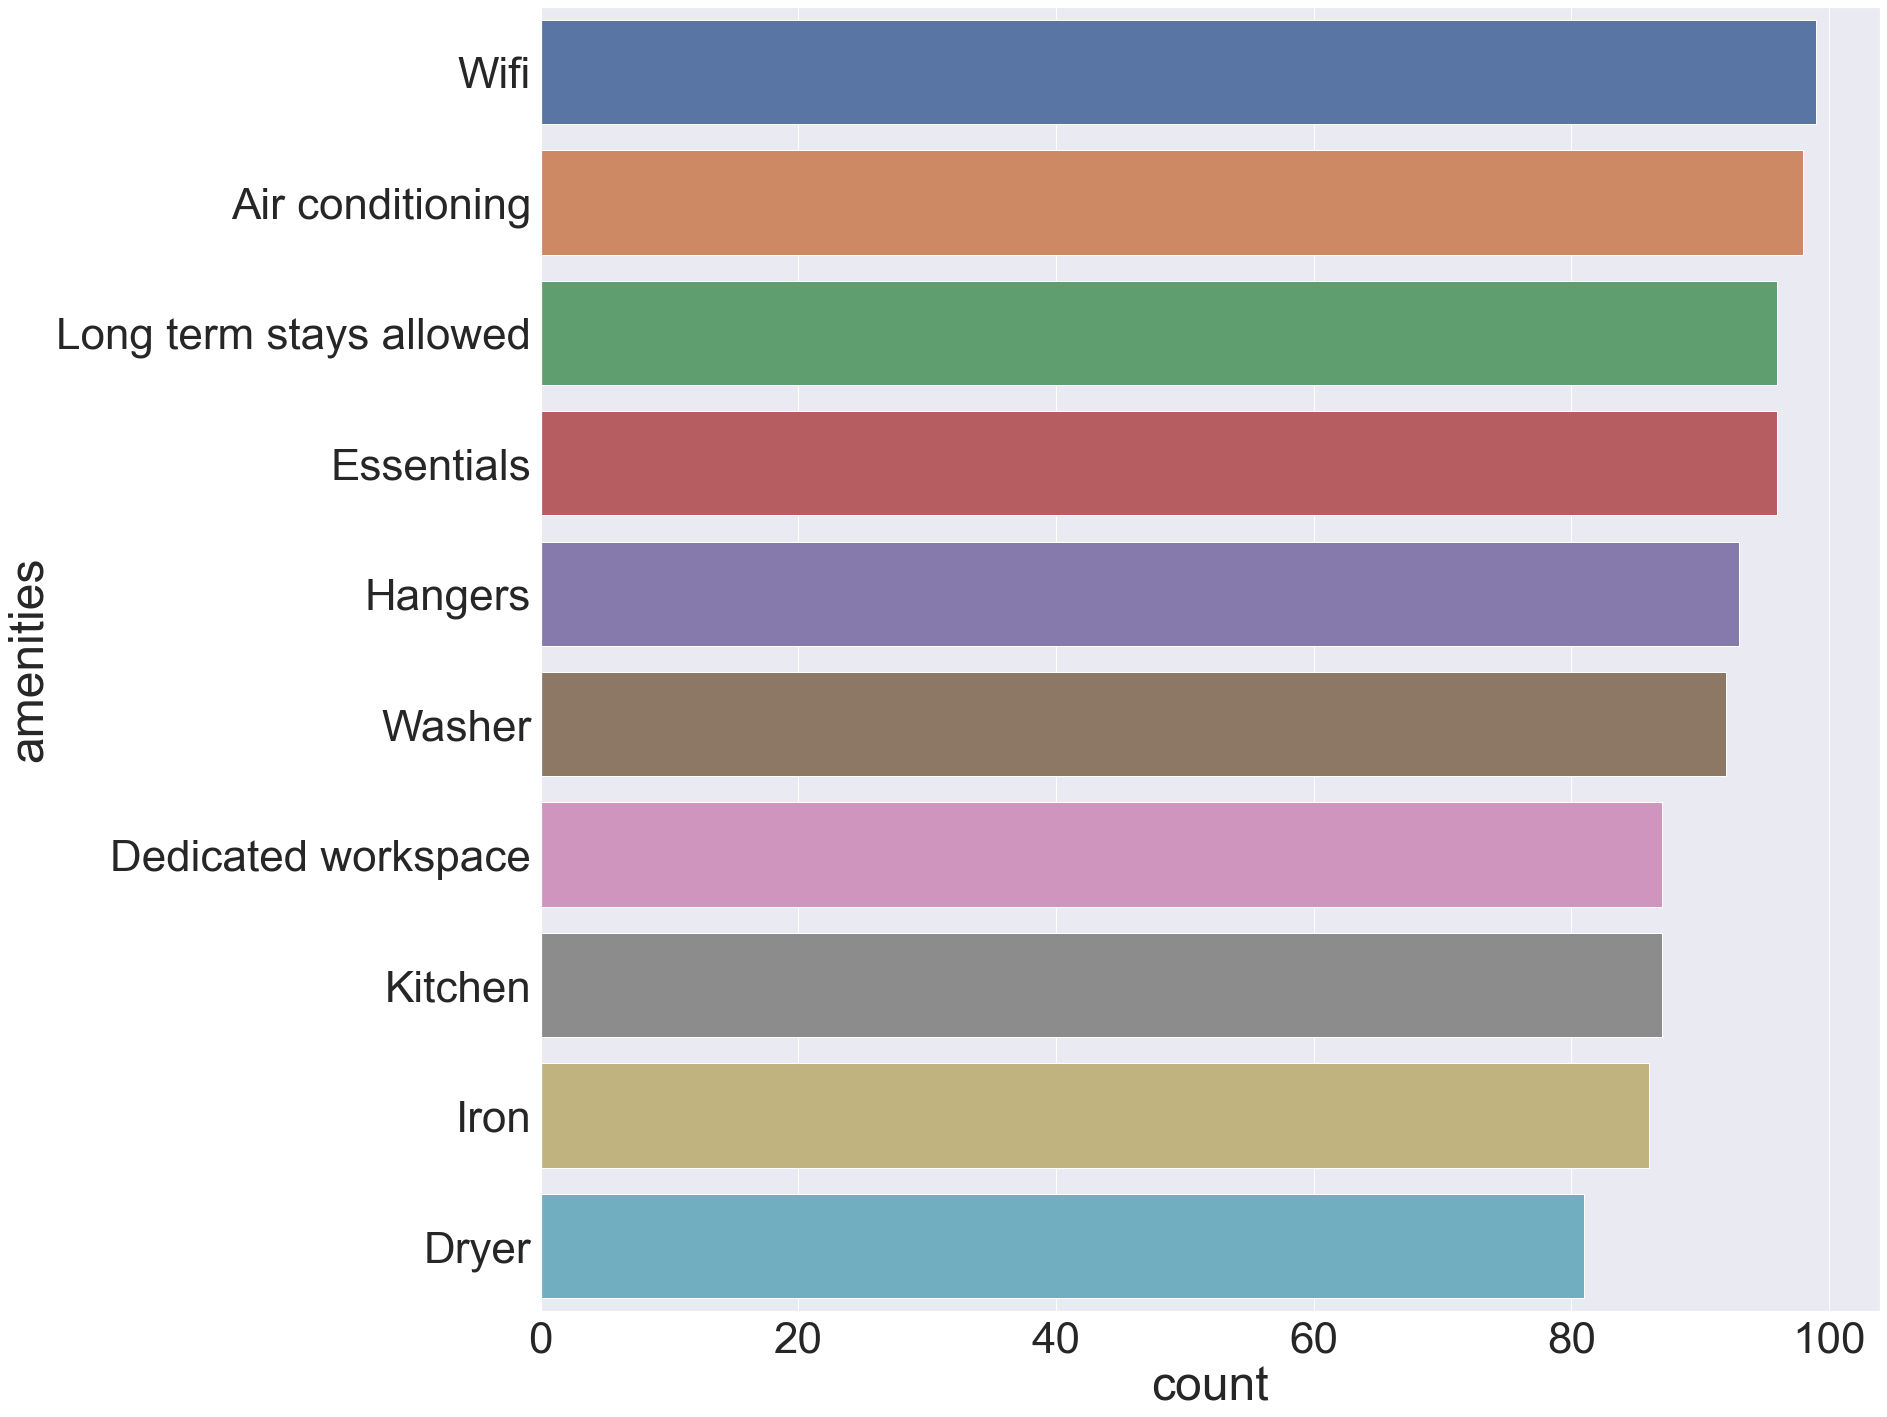

In [12]:
top_air["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
top_air["num_of_amenities"].head()
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="amenities", data=top_amenities,orient = "h")

In [13]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(top_amenities)

                 amenities  count
0                     Wifi     99
1         Air conditioning     98
2  Long term stays allowed     96
3               Essentials     96
4                  Hangers     93
5                   Washer     92
6      Dedicated workspace     87
7                  Kitchen     87
8                     Iron     86
9                    Dryer     81


# Property Type of the top Rated places|

In [14]:
top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["property_type"] =top_air["property_type"].to_frame()
top_air["property_type"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/3712839184.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')


0         Private room in apartment
1921    Private room in condominium
1919             Entire condominium
1917         Room in boutique hotel
1912      Private room in apartment
Name: property_type, dtype: object

<AxesSubplot:xlabel='count', ylabel='property_type'>

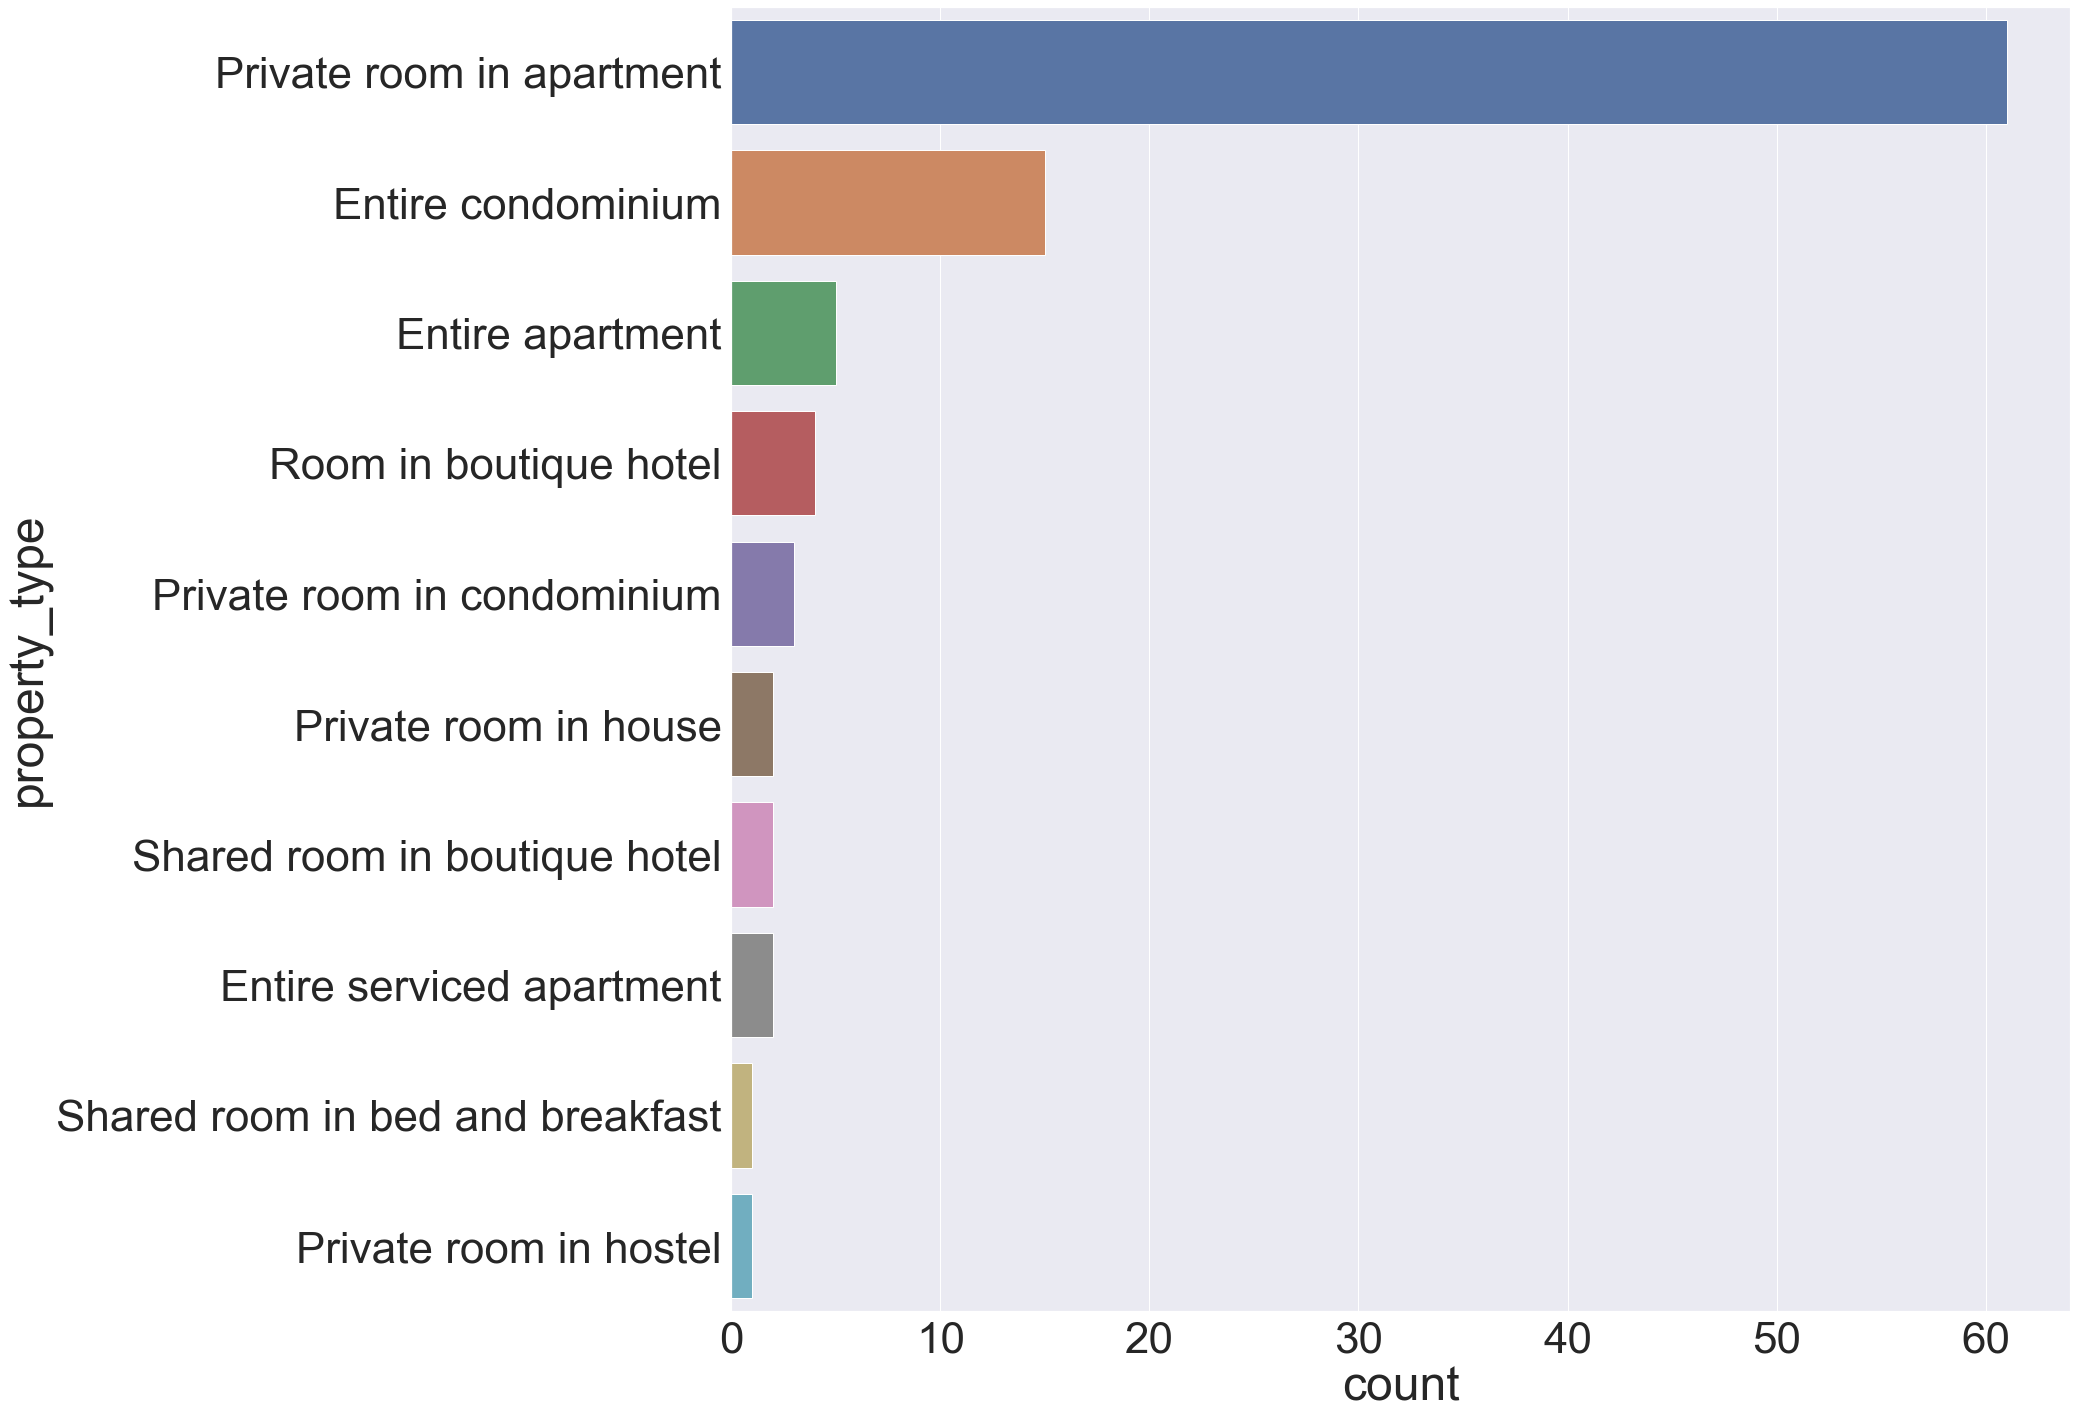

In [15]:
top_ptype = top_air['property_type'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_ptype = top_ptype.rename_axis('property_type').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="property_type", data=top_ptype,orient = "h")

In [16]:
top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["neighbourhood_cleansed"] =top_air["neighbourhood_cleansed"].to_frame()
top_air["neighbourhood_cleansed"].head()

top_neig = top_air['neighbourhood_cleansed'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_neig = top_neig.rename_axis('neighbourhood_cleansed').reset_index(name='count')


C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/1639407068.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')


<AxesSubplot:xlabel='count', ylabel='neighbourhood_cleansed'>

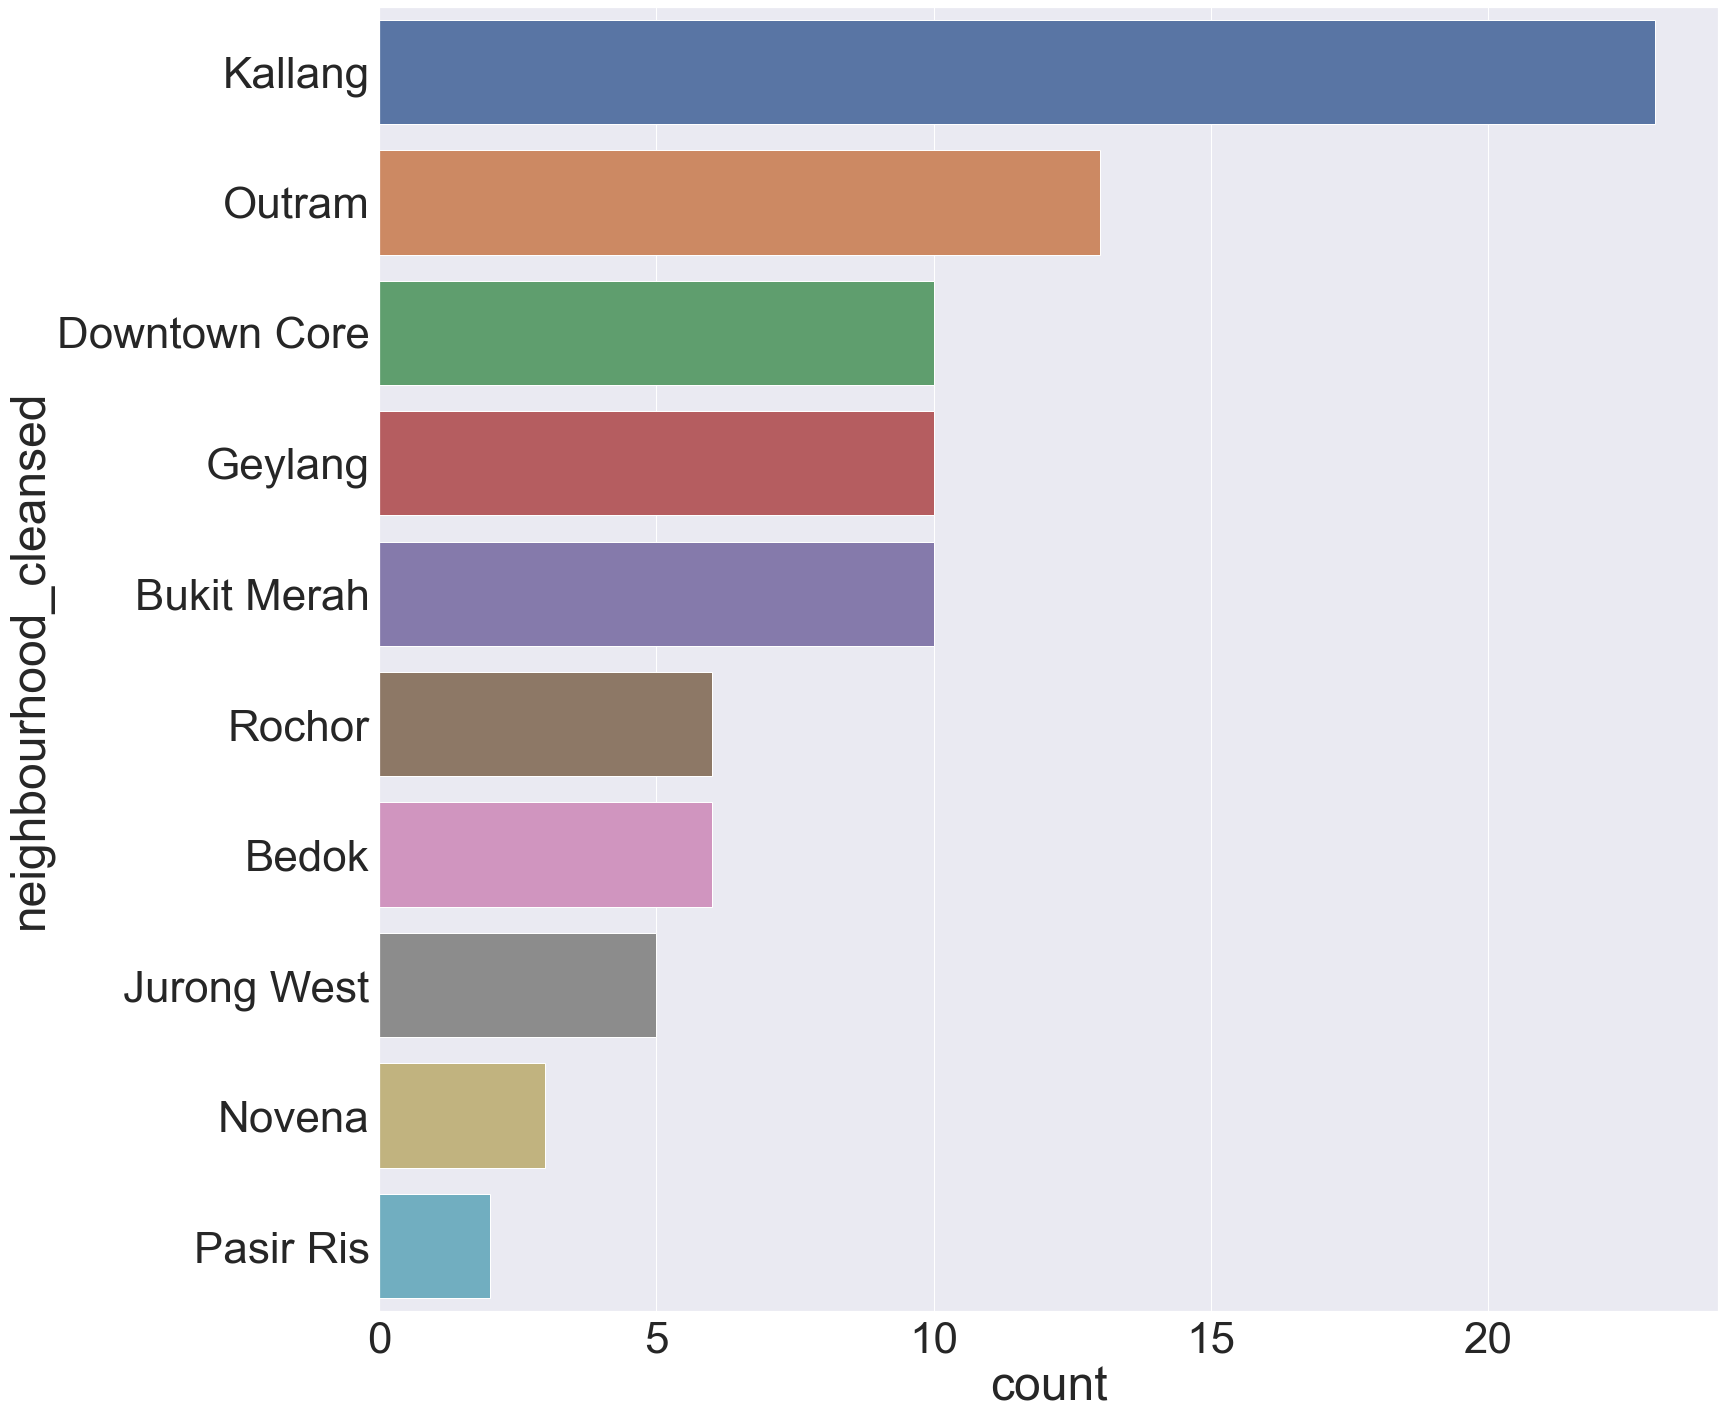

In [17]:
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="neighbourhood_cleansed", data=top_neig,orient = "h")

In [18]:
top_air["name"] = top_air["name"].str.replace(r'<[^<>]*>', ' ', regex=True)
#air_data["description"] = air_data["description"].str.replace(('\?|\|&|•|+|-|'), '',regex=True)
top_air["name"] = top_air["name"].str.replace('\W', ' ', regex=True)
des = pd.DataFrame(top_air["name"])
des["name"] = des["name"].str.replace('\d+', ' ', regex=True)
des.head()
top_words =  pd.DataFrame(' '.join(des["name"]).lower().split()).value_counts()[:50]
top_words = top_words.rename_axis('top_words').reset_index(name='count')
top_words.head()

,top_words,count
0,mrt,25
1,room,19
2,s,14
3,rm,14
4,br,14


In [19]:
print_full(top_words)

    top_words  count
0         mrt     25
1        room     19
2           s     14
3          rm     14
4          br     14
5    lavender     12
6        near     12
7          in     10
8        city      9
9   singlebed      9
10    private      8
11   heritage      8
12        min      8
13       view      8
14        apt      8
15      bahru      7
16  chinatown      7
17     window      7
18        cbd      7
19  apartment      7
20         to      7
21    ensuite      7
22       mins      7
23    tourist      7
24      tiong      7
25      pagar      6
26   aljunied      6
27         no      6
28       wifi      6
29    sharing      6
30       with      5
31    orchard      5
32        not      5
33       walk      5
34      bugis      5
35     single      5
36     master      5
37        rma      4
38        pod      4
39   queenbed      4
40   downtown      4
41        ntu      4
42       cozy      4
43       from      4
44          m      4
45          a      4
46    loftbed

In [20]:
#conda install -c conda-forge wordcloud

# Word Cloud to see most popular words

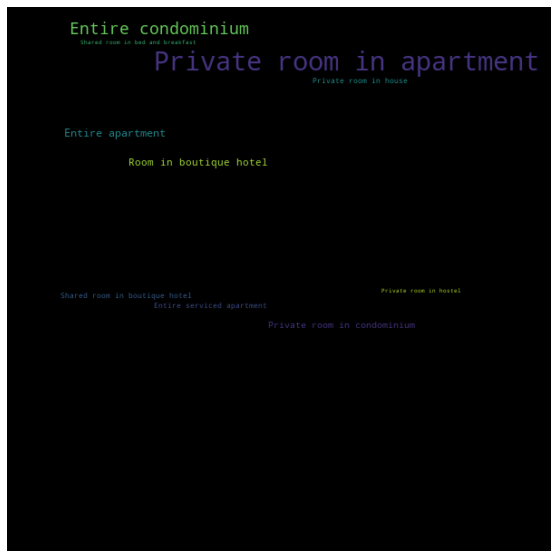

In [21]:
from wordcloud import WordCloud

d = dict(zip(top_ptype['property_type'], top_ptype['count']))


wordcloud = WordCloud(background_color="black",width=600, height=600).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

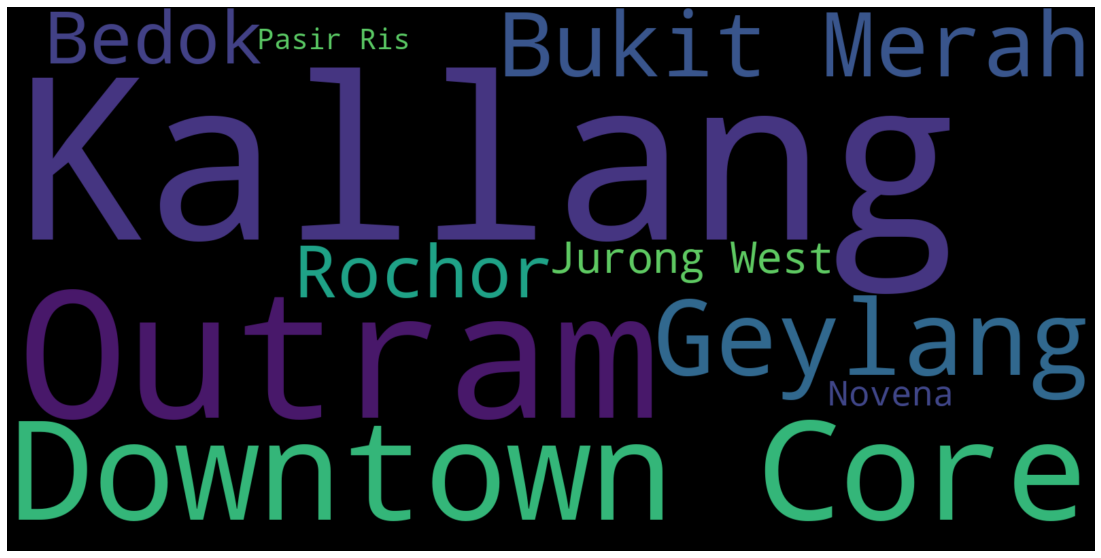

In [22]:
d = dict(zip(top_neig['neighbourhood_cleansed'], top_neig['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

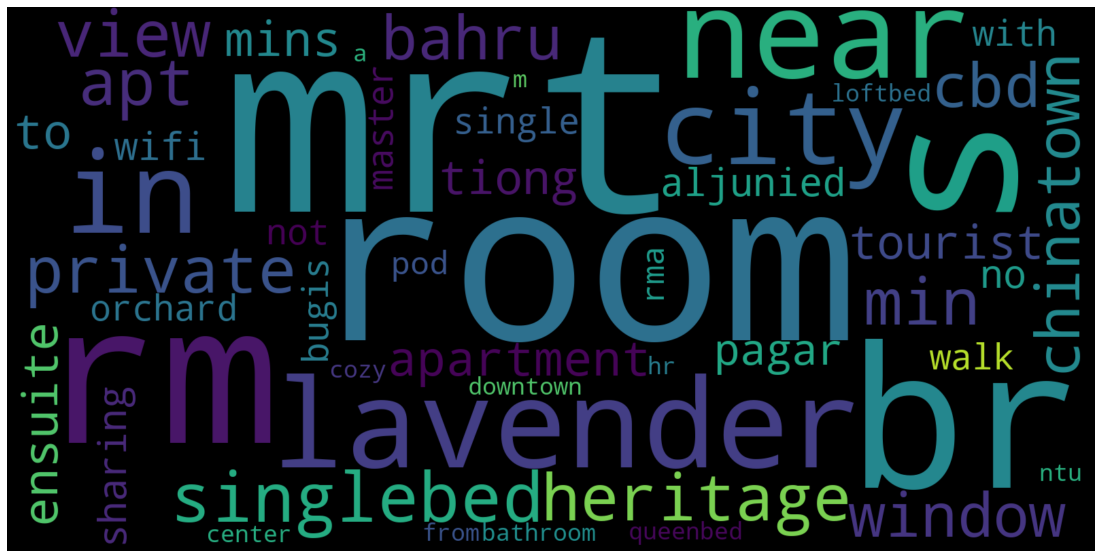

In [23]:

d = dict(zip(top_words['top_words'], top_words['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bar Plots for numerical values

In [24]:
test = pd.DataFrame(air_data[['price','review_scores_rating']])

<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>

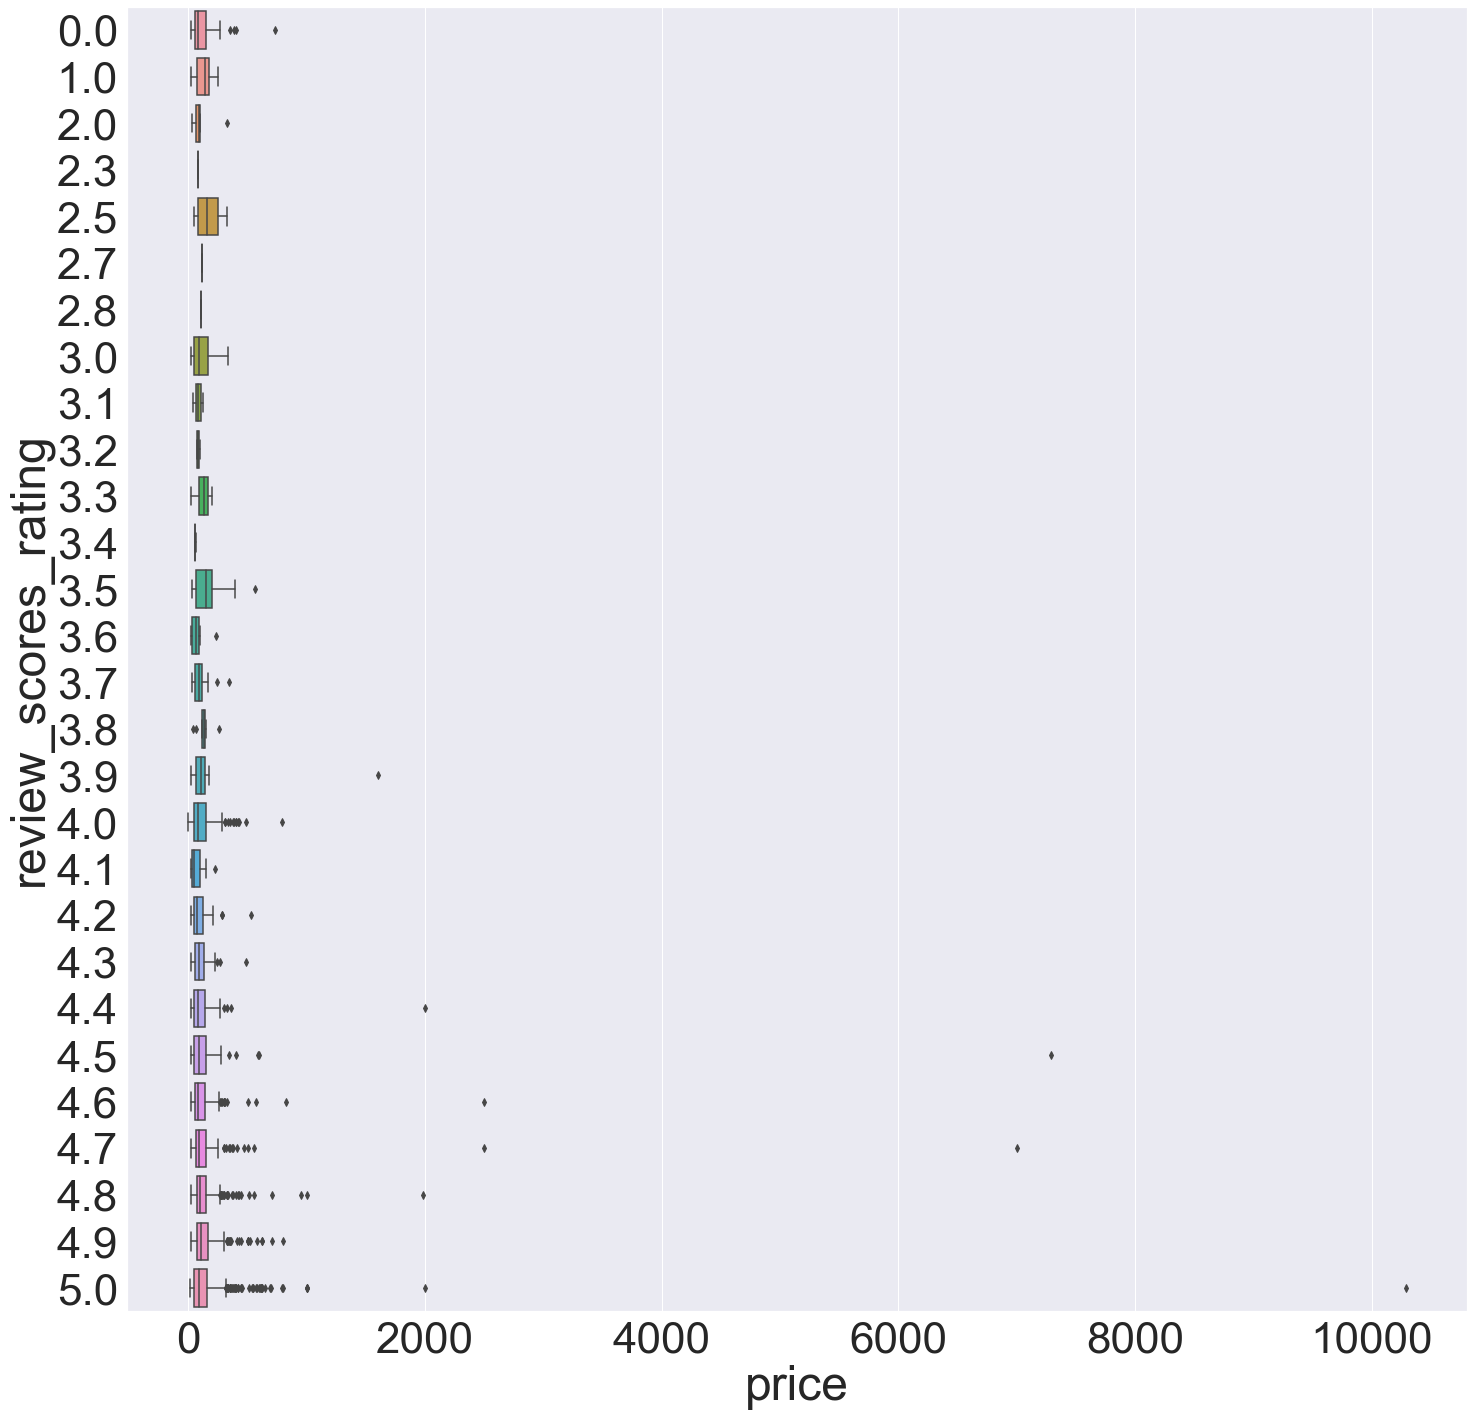

In [25]:
test = pd.DataFrame(air_data[['price','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='price', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_amenities', ylabel='review_scores_rating'>

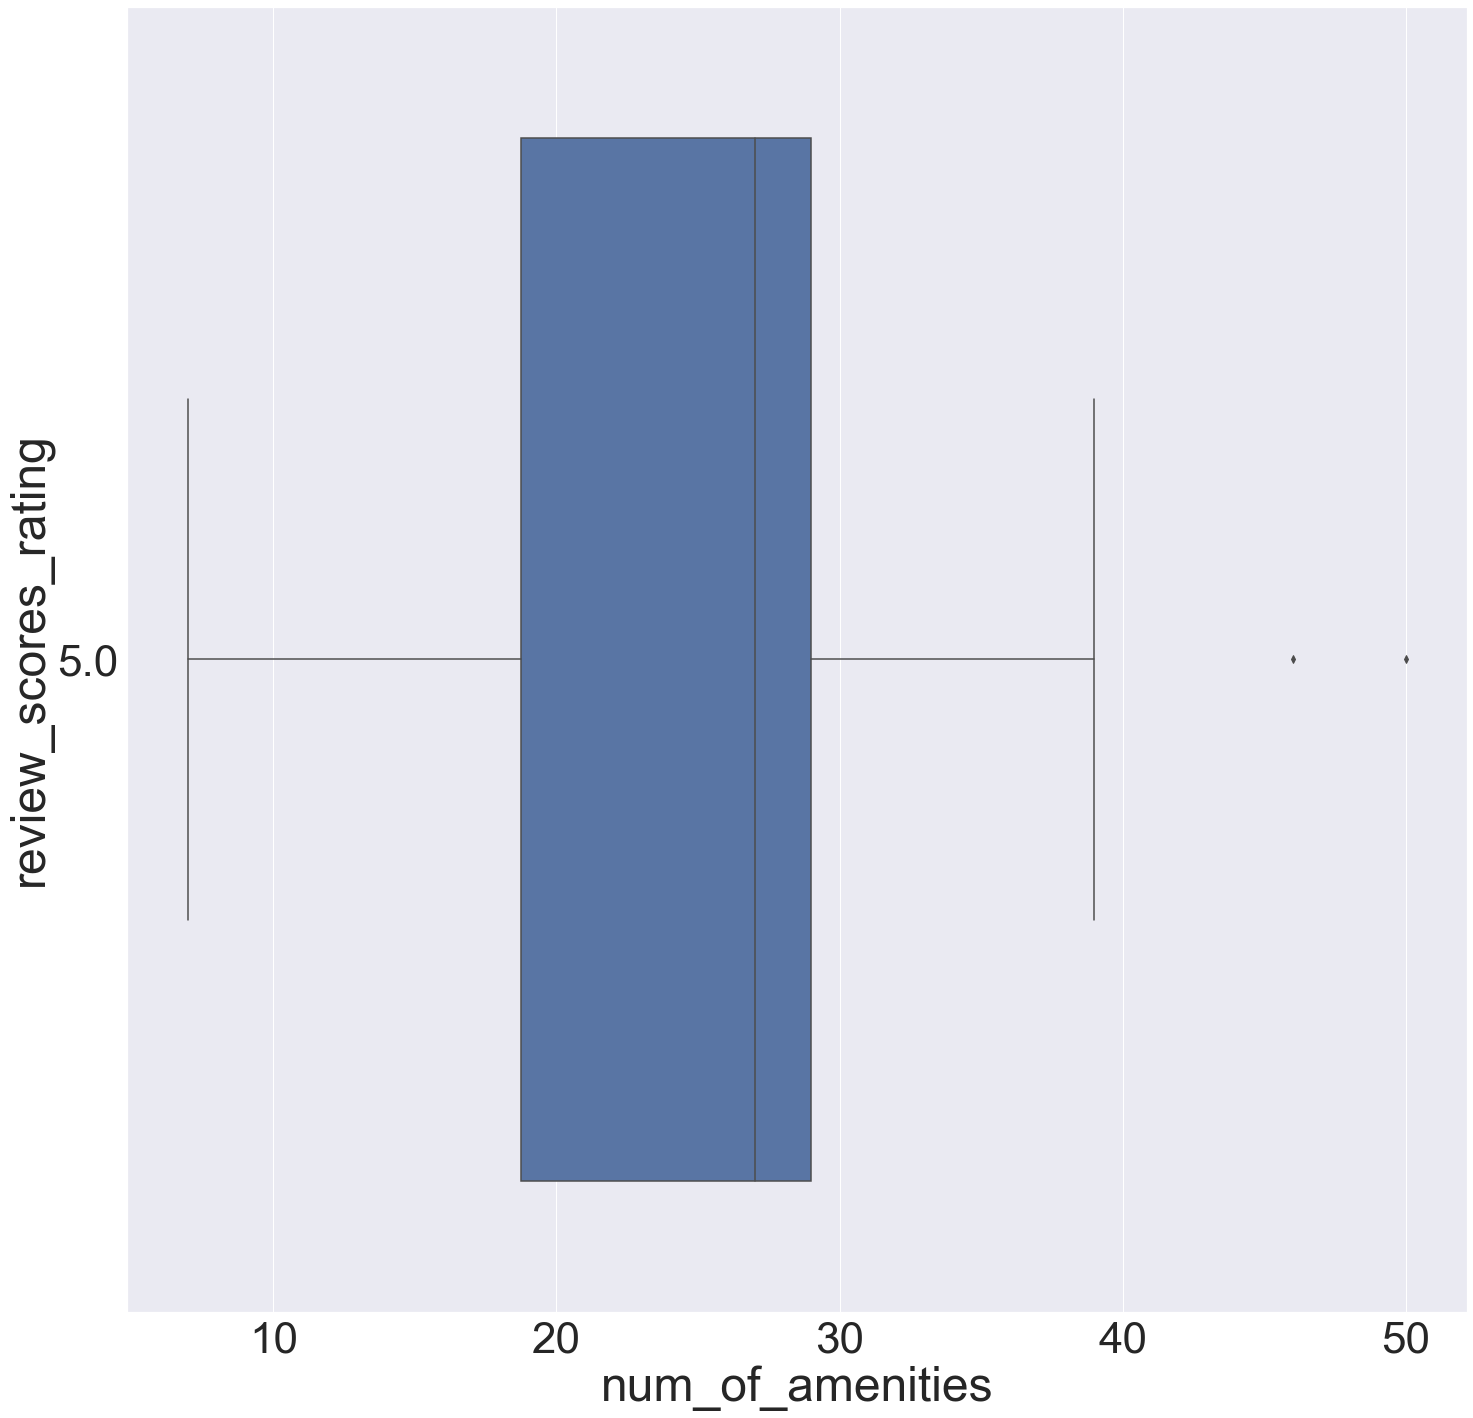

In [26]:
test = pd.DataFrame(top_air[['num_of_amenities','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_amenities', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_veri', ylabel='review_scores_rating'>

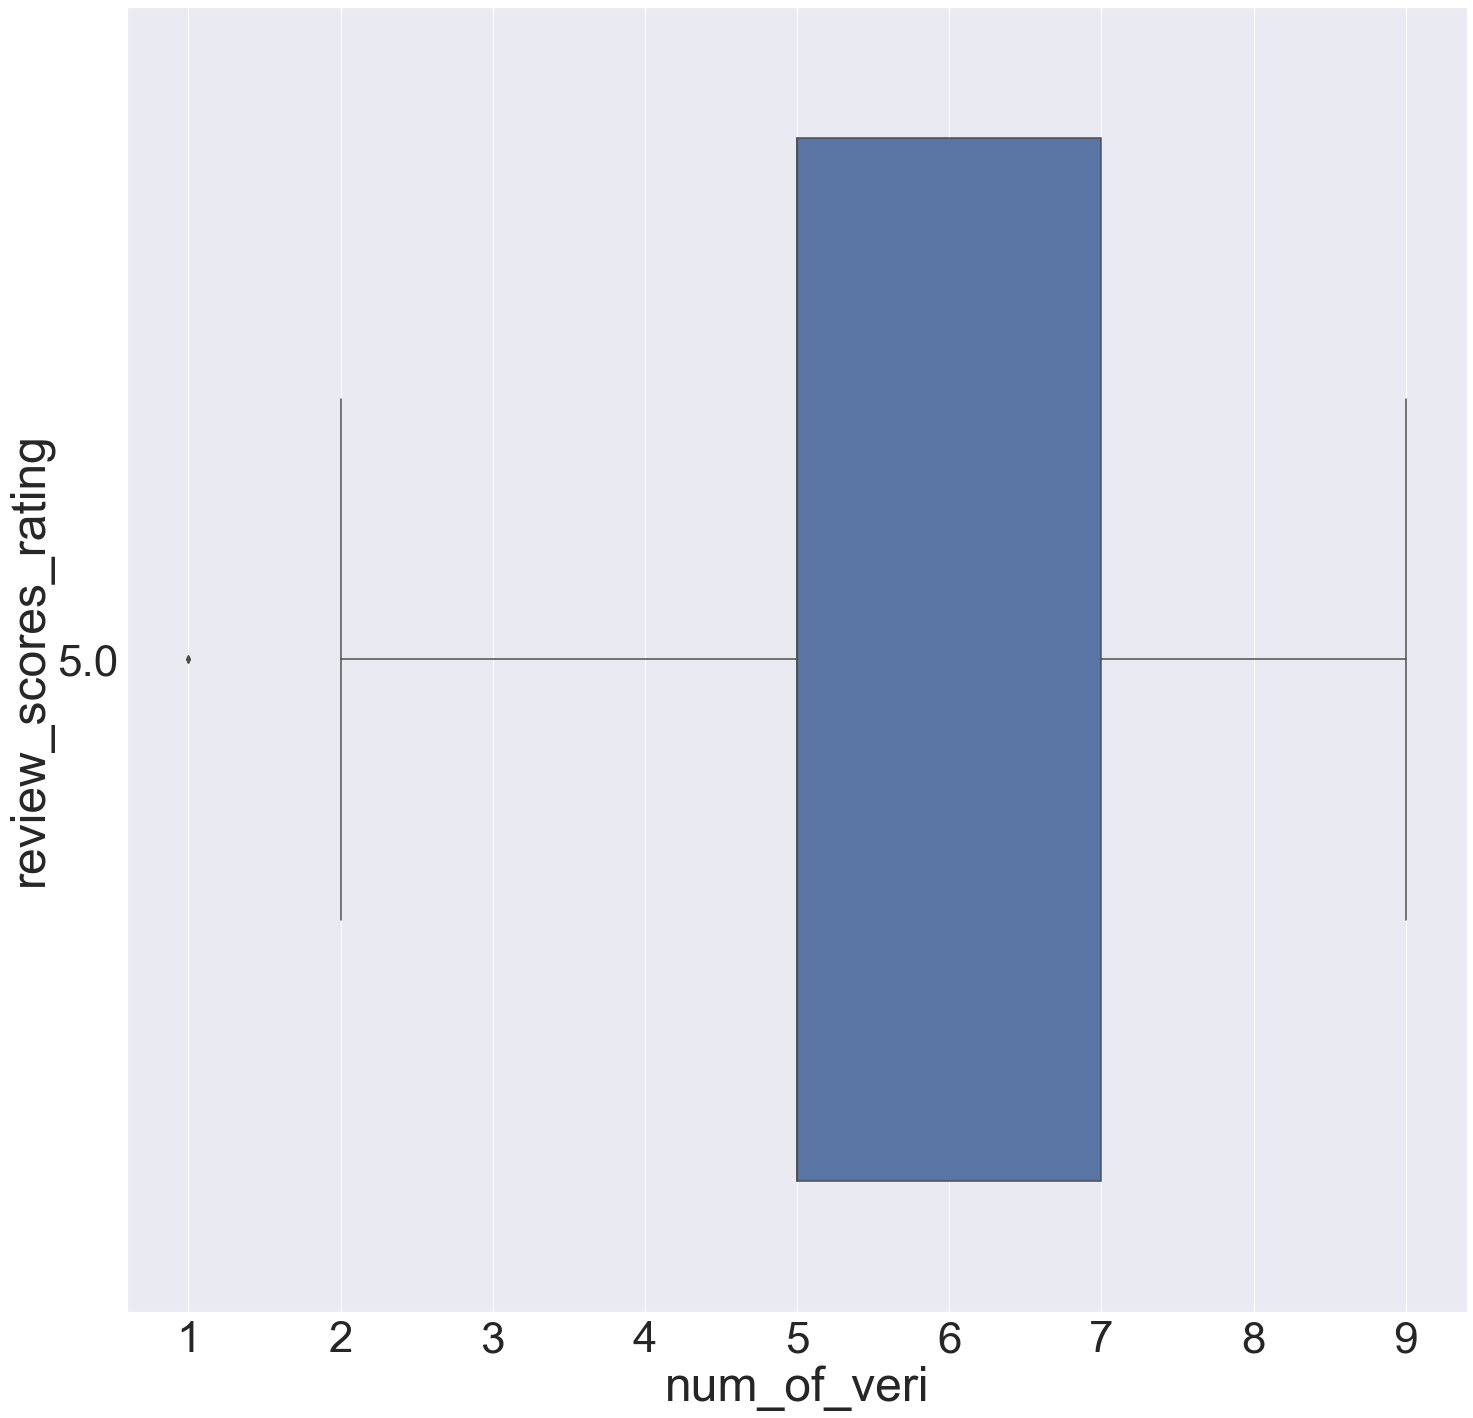

In [27]:
test = pd.DataFrame(top_air[['num_of_veri','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_veri', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_veri', ylabel='review_scores_rating'>

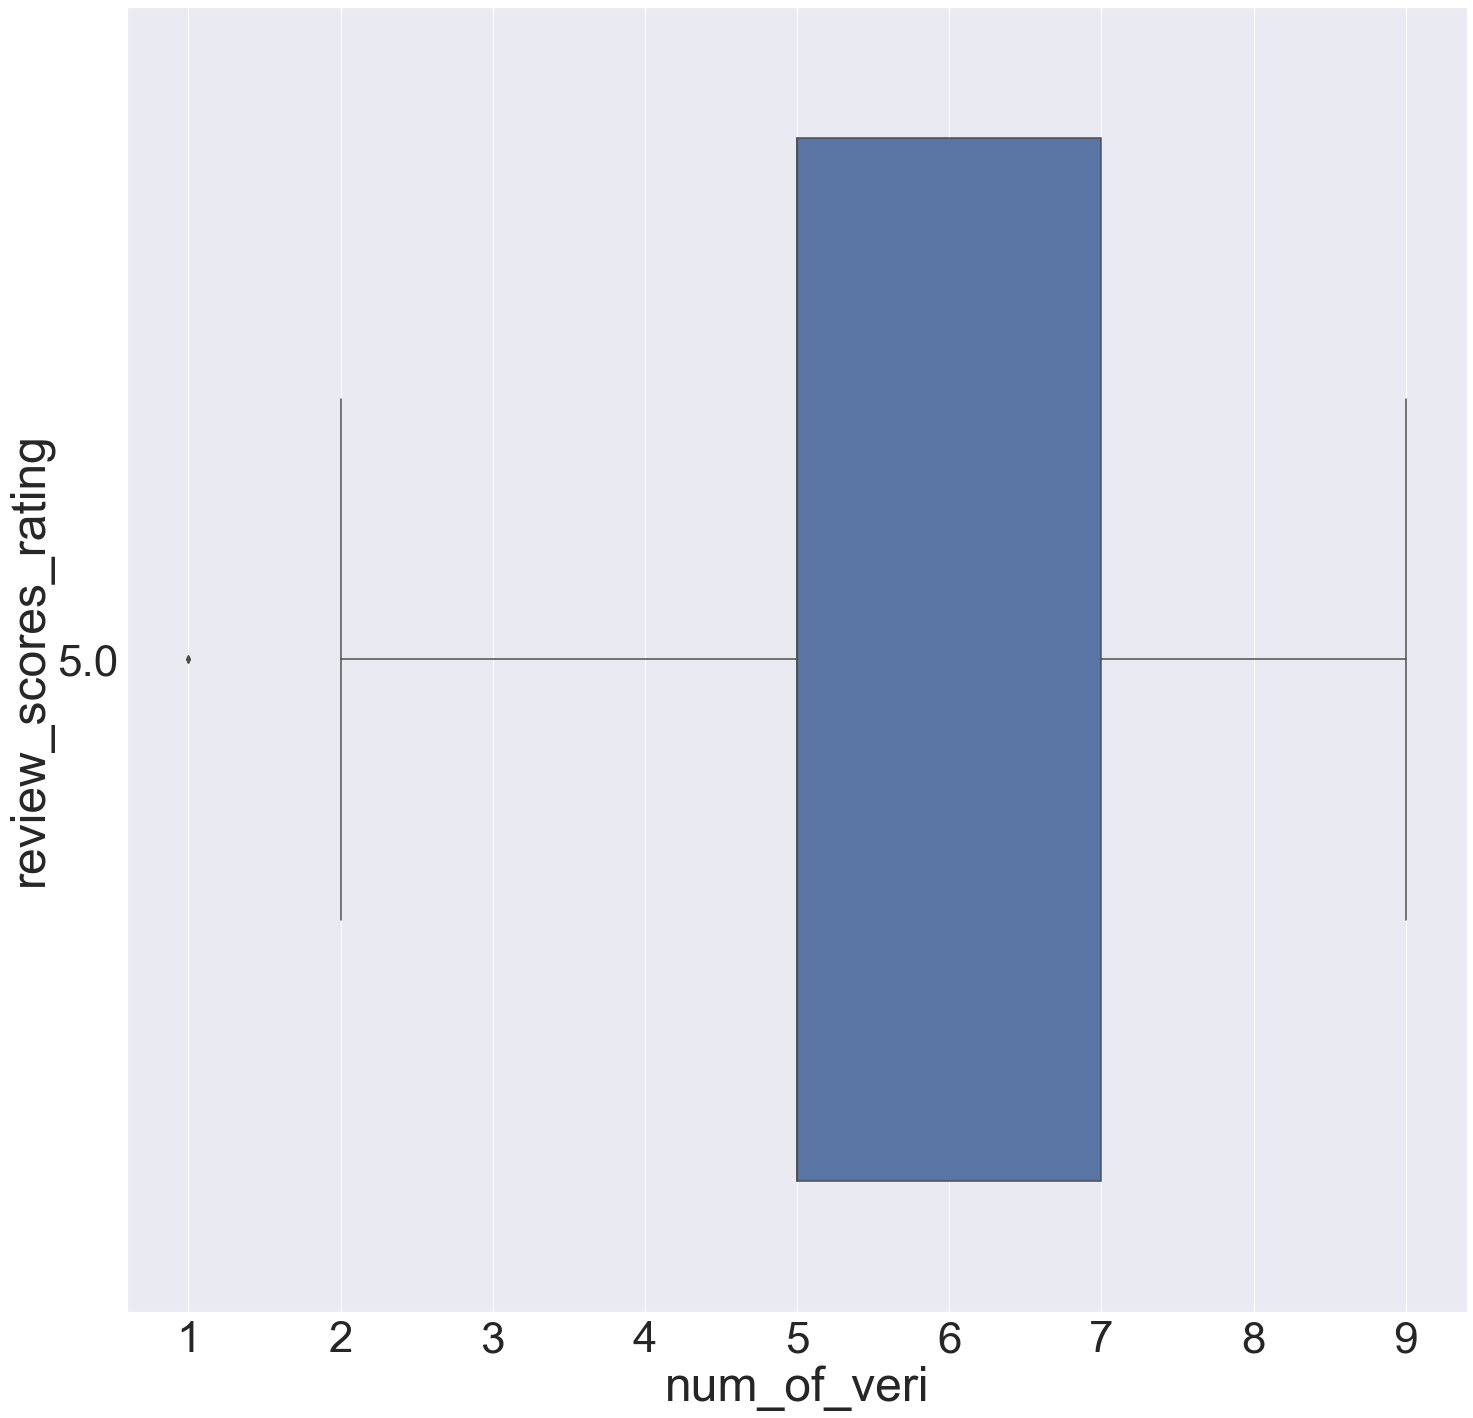

In [28]:
test = pd.DataFrame(top_air[['num_of_veri','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_veri', y="review_scores_rating", data=test,orient = "h")

# Putting price and amenities into the same dataframe to compare

In [29]:
amenities = zhdf[['price','amenities']]

amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
amenities['amenities'] = amenities['amenities'].apply(str).str.replace('[', '').str.replace(']','').str.replace('"','')

#str.replace(' ','')
#amenities = amenities.to_frame()

amenities.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/2700618335.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/2700618335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/2700618335.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single ch

,price,amenities
0,81.0,"Air conditioning, Elevator, Wifi, Long term st..."
1,80.0,"Air conditioning, Kitchen, Elevator, Wifi, Gym..."
2,67.0,"Air conditioning, Kitchen, Elevator, Wifi, Cab..."
3,177.0,"Wifi, Washer, Kitchen, Long term stays allowed..."
4,81.0,"Wifi, Washer, Kitchen, Long term stays allowed..."


# Check count of how many amenities are there in total

In [30]:
amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')
a = amenities['amenities'].str.split(', ', expand=True).stack().value_counts()
test_df = a.rename_axis('amenities').reset_index(name='count')

C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/3105268720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')


In [31]:
print_full(test_df)

                                             amenities  count
0                              Long term stays allowed   4157
1                                     Air conditioning   4107
2                                                 Wifi   4086
3                                           Essentials   3641
4                                               Washer   3603
5                                              Hangers   3432
6                                              Kitchen   3335
7                                                 Iron   3247
8                                  Dedicated workspace   3186
9                                           Hair dryer   3004
10                                               Dryer   2794
11                                           Hot water   2697
12                                             Shampoo   2670
13                                        Refrigerator   2217
14                                            Elevator   2147
15      

# Bar graph of amenity count

<BarContainer object of 15 artists>

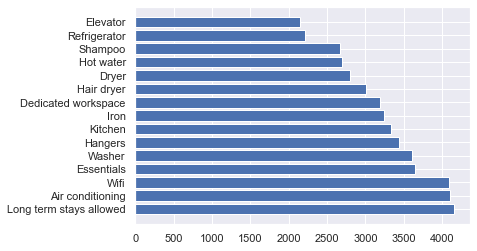

In [32]:
sb.set(font_scale=1)

plt.barh(test_df['amenities'].head(15), test_df['count'].head(15))

# Put price and rating into same dataframe to compare

In [33]:
pricedf = zhdf[['price', 'review_scores_rating']]
pricedf.head()

,price,review_scores_rating
0,$81.00,5.00
1,$80.00,4.56
2,$67.00,4.88
3,$177.00,4.44
4,$81.00,4.16


In [34]:
#remove extra unnecessary symbols and change price to float
pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
pricedf.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/1771786605.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/1771786605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)


,price,review_scores_rating
0,81.0,5.00
1,80.0,4.56
2,67.0,4.88
3,177.0,4.44
4,81.0,4.16


# Plot ratings against price

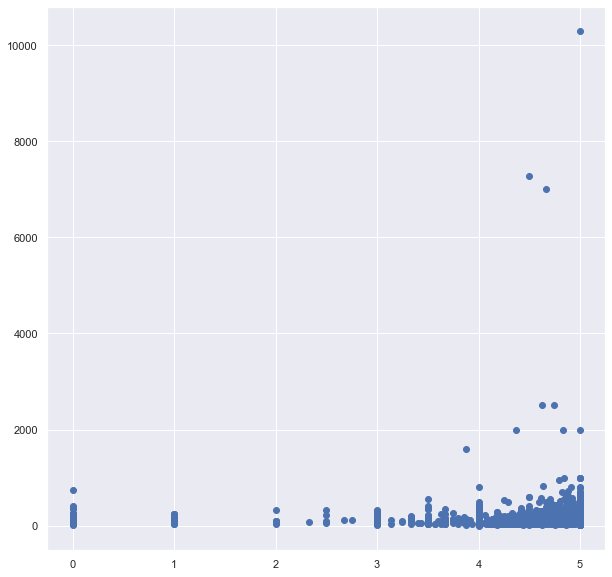

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(pricedf['review_scores_rating'], pricedf['price'])

In [36]:
test_df.head()

,amenities,count
0,Long term stays allowed,4157
1,Air conditioning,4107
2,Wifi,4086
3,Essentials,3641
4,Washer,3603


# Count number of amenities PER listing

In [37]:
amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)
amenities.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/2564024349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)


,price,amenities,amenities_count
0,81.0,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,"Wifi, Washer, Kitchen, Long term stays allowed...",21


# Regression plot for price against amenities count per listing

<AxesSubplot:xlabel='amenities_count', ylabel='price'>

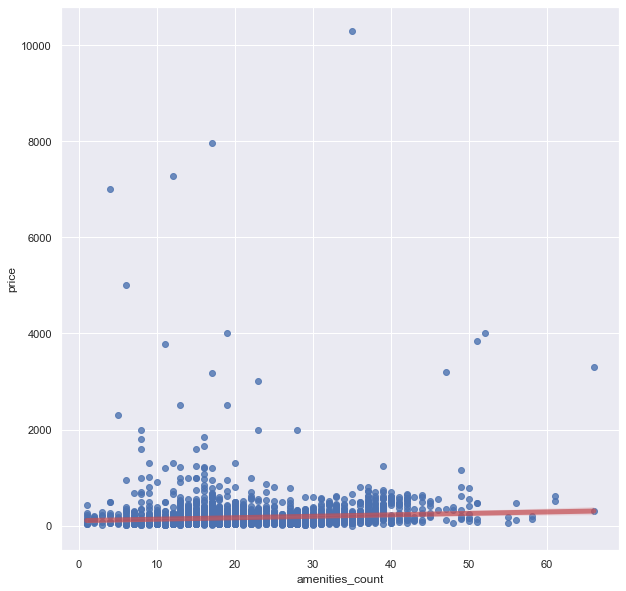

In [38]:
plt.figure(figsize=(10,10))
sb.regplot(y=amenities['price'], x=amenities['amenities_count'], line_kws={"color":"r","alpha":0.7,"lw":5})

In [39]:
amenities.insert(1, 'review_scores_rating', zhdf['review_scores_rating'])
amenities.head()

,price,review_scores_rating,amenities,amenities_count
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21


# Scatter plot of amenity count against ratings

<AxesSubplot:xlabel='review_scores_rating', ylabel='amenities_count'>

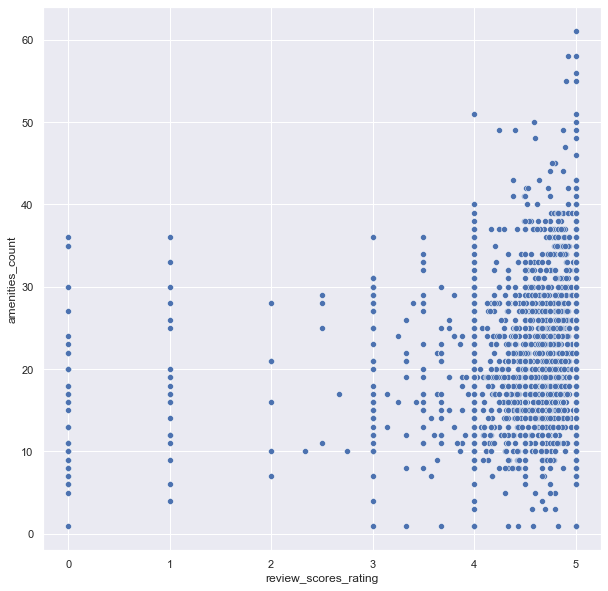

In [40]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=amenities['review_scores_rating'], y=amenities['amenities_count'])

In [41]:
amenity_list_top = test_df['amenities'].head(15)
print(amenity_list_top)

0     Long term stays allowed
1            Air conditioning
2                        Wifi
3                  Essentials
4                      Washer
5                     Hangers
6                     Kitchen
7                        Iron
8         Dedicated workspace
9                  Hair dryer
10                      Dryer
11                  Hot water
12                    Shampoo
13               Refrigerator
14                   Elevator
Name: amenities, dtype: object


In [42]:
#check amenity list against amenity column to see if it exists, then
#then append column to dataframe

for i in amenity_list_top:
    amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))
    
amenities.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_2604/1343124337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))


,price,review_scores_rating,amenities,amenities_count,has_long term stays allowed,has_air conditioning,has_wifi,has_essentials,has_washer,has_hangers,has_kitchen,has_iron,has_dedicated workspace,has_hair dryer,has_dryer,has_hot water,has_shampoo,has_refrigerator,has_elevator
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
